In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
data.drop('Species', inplace=True, axis=1)

In [13]:
model = KMeans(n_clusters=3, random_state=42) 
iris_kmeans = model.fit(data)

In [14]:
iris_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
from sklearn.utils import shuffle

# import some data to play with
data = shuffle(data, random_state=42)

In [16]:
model = KMeans(n_clusters=3, random_state=42) 
iris_kmeans = model.fit(data)

In [17]:
iris_kmeans.labels_

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0])

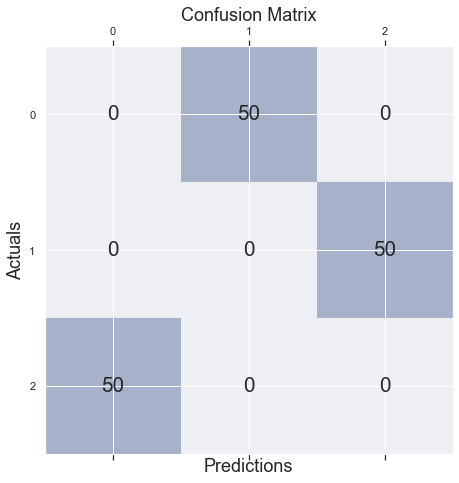

In [18]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, iris_kmeans.labels_) 

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [19]:
from matplotlib.colors import ListedColormap

TypeError: '(slice(None, None, None), 3)' is an invalid key

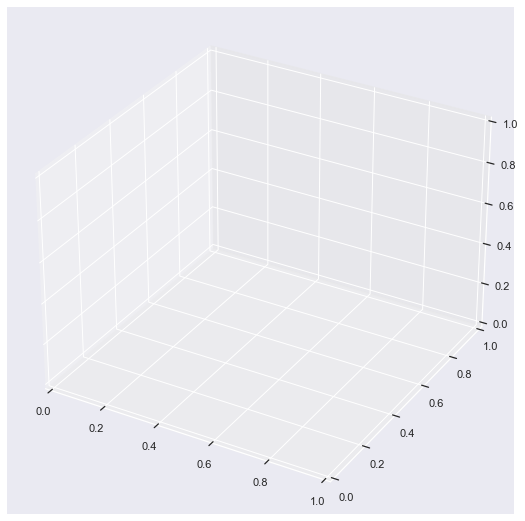

In [20]:

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(data[:, 3], data[:, 0], data[:, 2], 
            c=iris_kmeans.labels_.astype(float), 
           edgecolor="k", s=150, cmap=customcmap)
ax1.view_init(20, -50)
ax1.set_xlabel(names[3], fontsize=12)
ax1.set_ylabel(names[0], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for label, name in enumerate(['virginica','setosa','versicolor']):
    ax2.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax2.scatter(data[:, 3], data[:, 0], data[:, 2], 
            c=y, edgecolor="k", s=150, 
            cmap=customcmap)
ax2.view_init(20, -50)
ax2.set_xlabel(names[3], fontsize=12)
ax2.set_ylabel(names[0], fontsize=12)
ax2.set_zlabel(names[2], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=12)
fig.show()


Text(0, 0.5, 'WCSS')

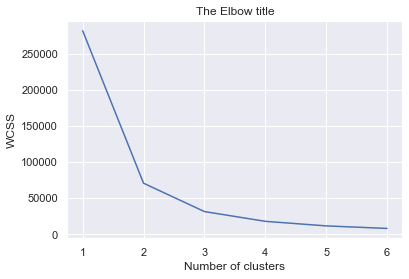

In [22]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')